#**Restaurant Data Extraction from Yelp Dataset and Yelp Fusion API**


**Reading review.json file and converting it to pandas dataframe**

In [0]:
import json
import pandas as pd
import matplotlib.pyplot as plt
# open input file: 
ifile = open('review.json',errors='ignore') 
# read the first 100k entries
# set to -1 to process everything
stop = 1000
review_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    business_id=data['business_id']
    useful=data['useful']
    funny=data['funny']
    cool=data['cool']
    # add to the data collected so far
    review_data.append([business_id,text,stars,useful,funny,cool])
# create the DataFrame
review_df = pd.DataFrame(review_data, columns=['business_id','text','stars','useful','funny','cool'])
print(review_df)
# df.to_hdf('revie20ws.h5','reviews')
ifile.close()

0
                business_id  \
0    ujmEBvifdJM6h6RLv4wQIg   
1    NZnhc2sEQy3RmzKTZnqtwQ   
2    WTqjgwHlXbSFevF32_DJVw   
3    ikCg8xy5JIg_NGPx-MSIDA   
4    b1b1eb3uo-w561D0ZfCEiQ   
5    eU_713ec6fTGNO4BegRaww   
6    3fw2X5bZYeW9xCz_zGhOHg   
7    zvO-PJCpNk4fgAVUnExYAA   
8    b2jN2mm9Wf3RcrZCgfo1cg   
9    oxwGyA17NL6c5t1Etg5WgQ   
10   8mIrX_LrOnAqWsB5JrOojQ   
11   mRUVMJkUGxrByzMQ2MuOpA   
12   FxLfqxdYPA6Z85PFKaqLrg   
13   LUN6swQYa4xJKaM_UEUOEw   
14   AakkkTuGZA2KBodKi2_u8A   
15   YvrylyuWgbP90RgMqZQVnQ   
16   NyLYY8q1-H3hfsTwuwLPCg   
17   cHdJXLlKNWixBXpDwEGb_A   
18   6lj2BJ4tJeu7db5asGHQ4w   
19   y-Iw6dZflNix4BdwIyTNGA   
20   qx6WhZ42eDKmBchZDax4dQ   
21   Mem13A3C202RzT53npn4NA   
22   I4Nr-MVc26qWr08-S3Q1ow   
23   d_L-rfS1vT3JMzgCUGtiow   
24   Sfc8Haz2Yri8Mo1L0E0TsA   
25   FQ1wBQb3aNeRMThSQEV0Qg   
26   hd5xm20tfSa70-6UqD9-bg   
27   Gyrez6K8f1AyR7dzW9fvAw   
28   9nTF596jDvBBia2EXXiOOg   
29   SNL64axQhCO6Z7ohcWg3wA   
..                      ...   
970  m

**Reading business.json file and converting it to pandas dataframe.**

In [0]:
ifile = open('business.json',errors='ignore') 
# read the first 100k entries
# set to -1 to process everything
stop = 1000
biz_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    business_id=data['business_id']
    name=data['name']
    is_open=data['is_open']
    latitude=data['latitude']
    longitude=data['longitude']
    city=data['city']
    state=data['state']
    stars=data['stars']
    att=data['attributes']
    
    # add to the data collected so far
    biz_data.append([business_id,name, stars, is_open,latitude, longitude, city, state,att])
# create the DataFrame
biz_df = pd.DataFrame(biz_data, columns=['business_id','name','stars','is_open','latitude','longitude','city','state','attributes'])
print(biz_df)
# df.to_hdf('revie20ws.h5','reviews')
ifile.close()

0
                business_id                                       name  stars  \
0    1SWheh84yJXfytovILXOAQ                 Arizona Biltmore Golf Club    3.0   
1    QXAEGFB4oINsVuTFxEYKFQ                 Emerald Chinese Restaurant    2.5   
2    gnKjwL_1w79qoiV3IC_xQQ                Musashi Japanese Restaurant    4.0   
3    xvX2CttrVhyG2z1dFg_0xw            Farmers Insurance - Paul Lorenz    5.0   
4    HhyxOkGAM07SRYtlQ4wMFQ                        Queen City Plumbing    4.0   
5    68dUKd8_8liJ7in4aWOSEA                              The UPS Store    2.5   
6    5JucpCfHZltJh5r1JabjDg                           Edgeworxx Studio    3.5   
7    gbQN7vr_caG_A1ugSmGhWg                                  Supercuts    3.5   
8    Y6iyemLX_oylRpnr38vgMA                    Vita Bella Fine Day Spa    5.0   
9    4GBVPIYRvzGh4K4TkRQ_rw                        Options Salon & Spa    4.5   
10   fcXOEZdXYeZqnQ3lGlOXmg                Nucleus Information Service    2.0   
11   1Dfx3zM-rW4n-31KeC8sJ

**Joining both the reviews and business dataframe based on the commmon column of business_id so as to get the location information of each business for which the review is written. This location information will be further used to "filter the businesses as restaurants" using the Yelp API, as we want to focus on restaurant reviews only**

In [0]:
joined_df=pd.merge(review_df,biz_df,on='business_id',how='inner')
# print(joined_df)
joined_open_df=joined_df[joined_df['is_open']==1]
joined_open_df=joined_open_df.reset_index(drop=True)
# print(joined_open_df)
joined_open_df.head()

business_id                                               text  \
0  sMzNLdhJZGzYirIWt-fMAg  This place epitomizes the rumored transformati...   
1  jScBTQtdAt-8RshaiBEHgw  Party of 3 ordered the fish tacos, pork belly ...   
2  WsdmzI2giWHcRN2plprxIg  Took my kids here to hang out on one fine 72 d...   
3  KjicU7uxRt2KDEnO5cgxDQ  This company tried deliver flowers to our home...   
4  CGUK3cd2gxp2q3KPY19Oog  Yum!! Had the kale grits and would definitely ...   

   stars_x  useful  funny  cool                           name  stars_y  \
0      5.0       0      0     0                 Sienna Mercato      4.0   
1      5.0       1      0     1                         Served      4.5   
2      2.0       5     14     4  Aliante Nature Discovery Park      3.5   
3      1.0       0      0     0                Arizona Florist      3.0   
4      5.0       0      0     0                     Roots Cafe      4.0   

   is_open   latitude   longitude             city state  \
0        1  40.443950  -79.996437       Pittsburgh    PA   
1        1  36.010745 -115.064803        Henderson    NV   
2        1  36.287422 -115.176694  North Las Vegas    NV   
3        1  33.428259 -112.048848          Phoenix    AZ   
4        1  35.206507  -80.860258        Charlotte    NC   

                                          attributes  
0  {'BusinessAcceptsCreditCards': 'True', 'Busine...  
1  {'DriveThru': 'False', 'RestaurantsAttire': ''...  
2  {'GoodForKids': 'True', 'BikeParking': 'True',...  
3  {'RestaurantsDelivery': 'True', 'BusinessParki...  
4  {'BusinessParking': '{'garage': False, 'street...

In [0]:
print(len(joined_open_df))

5823662


**Now for each location(city) in the joined dataframe, we call the yelp fusion API which we use to find the information about the restaurants and the business ids of the restaurants in that particular location. Each API call (for each location) gives us data about maximum 50 restaurants/businesses in that location. But since most of locations have more than 50 restaurants, we call the API by setting an offset each time and looping over the datafram for all the unique locations(cities) in the dataframe. We keep incrementing the offset each time and get the data of the businesses in the cities for the next set of 50 restaurants progressively.**

**Also, there was a limit on the number of API calls per day of 5000 API calls, we changed different accounts and different API keys till we were able to fetch sufficient numer of restarants. The next few cells basically perform this operation.**

In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
api_key='GWlTnkhR-sot1qbYMIVDA4qR3gAytEl4kv5tC4JKPnzvLMfvkqJZ2ZyPyozwhWBwG5pbINhsdSQ-w5Q0FMZBUMQQ18ykBBQjBzTnm6qKN5wJxCr66LYD5ZWS9YfMXXYx'
cur_biz_count=0
biz_id_list=[]
biz_name_list=[]
biz_rev_count=[]
city_names=joined_open_df.city.unique()
city_names=np.delete(city_names,[545])
# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
max_total=0
total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=0)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
    if(search_res['total']>max_total):
        max_total=search_res['total']
   
    total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed first 50 biz ids, names and review counts for all cities")
print("limit=50, offset=0")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

print("total restaurants expected = ",total_restaurants)
print("current restaurants processed (expected 50*1148) = ",cur_biz_count)
print("max restaurant count for a city:",max_total)
print("will have to loop till here in batches of 50")
# print(count)



0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 631
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
print("current restaurants processed (expected 50*1148) = ",len(biz_id_list))


current restaurants processed (expected 50*1148) =  52259


In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

52259
1345494


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='pWqq-wlqk7Tc0xcFoA9lEt01vCYSz5aSjtSA3RkmfGRscyksdyEc_bSroa71nsZYSSShnnXaBkCYPVxj_9G6p43hp7Da2WSKaKkKU91f0ygAEh9_lIsfoqlI0gnRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=50)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=50")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-100 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 631
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

97657
1806290


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='pWqq-wlqk7Tc0xcFoA9lEt01vCYSz5aSjtSA3RkmfGRscyksdyEc_bSroa71nsZYSSShnnXaBkCYPVxj_9G6p43hp7Da2WSKaKkKU91f0ygAEh9_lIsfoqlI0gnRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=100)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=50")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-150 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 631
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

139584
2098355


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='pWqq-wlqk7Tc0xcFoA9lEt01vCYSz5aSjtSA3RkmfGRscyksdyEc_bSroa71nsZYSSShnnXaBkCYPVxj_9G6p43hp7Da2WSKaKkKU91f0ygAEh9_lIsfoqlI0gnRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=150)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=50")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-200 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 631
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

194306
2306330


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='Dn7L4kTpzvTkJ_7K69zrU1zSlEbvrKlAqbcja9PvZoDaBnEsPyhmjJsnc_HBaj4DGqnF9LXXlnsrYKNPn_j98mIIQ23B5xmjQxQSBebSRSIIsRJGydJKmOPUQnDRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=200)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=50")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-150 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 630
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

266296
2458310


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='Dn7L4kTpzvTkJ_7K69zrU1zSlEbvrKlAqbcja9PvZoDaBnEsPyhmjJsnc_HBaj4DGqnF9LXXlnsrYKNPn_j98mIIQ23B5xmjQxQSBebSRSIIsRJGydJKmOPUQnDRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=250)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=250")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-300 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 630
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

312070
2568956


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='Dn7L4kTpzvTkJ_7K69zrU1zSlEbvrKlAqbcja9PvZoDaBnEsPyhmjJsnc_HBaj4DGqnF9LXXlnsrYKNPn_j98mIIQ23B5xmjQxQSBebSRSIIsRJGydJKmOPUQnDRXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=300)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=300")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-350 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 630
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

344617
2673324


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='6F_K83MZ01vUJNWGSk_jcDHJuZB243aEns0tCWf2eaz85WJBXhRZ1GeNCvgSBI3v-d1iJreMtVl8Z940njWHfzPLx0ZLtqGWG7j1G9vUKDBlhMa8RFc_GJEP9o7RXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=350)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=350")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-400 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 630
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

384494
2750997


In [0]:
from yelpapi import YelpAPI
import argparse
import numpy as np
# //updated key
api_key='6F_K83MZ01vUJNWGSk_jcDHJuZB243aEns0tCWf2eaz85WJBXhRZ1GeNCvgSBI3v-d1iJreMtVl8Z940njWHfzPLx0ZLtqGWG7j1G9vUKDBlhMa8RFc_GJEP9o7RXXYx'
cur_biz_count=0

# print(type(city_names))
# cityCount=0
# for city in city_names:
#     print(cityCount,city)
#     cityCount+=1
# print(len(city_names))

city_count=0
# max_total=0
# total_restaurants=0
for city in city_names:
    yelp_api=YelpAPI(api_key, timeout_s=3.0)
    search_res=yelp_api.search_query(location=city,categories='restaurants',limit=50,offset=400)
    
    print(city_count,city,search_res['total'])
    city_count+=1
    
#     if(search_res['total']>max_total):
#         max_total=search_res['total']
   
#     total_restaurants+=search_res['total']
    
    
    for biz in search_res['businesses']:
        biz_id_list.append(biz['id'])
        biz_name_list.append(biz['name'])
        biz_rev_count.append(biz['review_count'])
        
#     cur_biz_count+=search_res['total']
# print(bizlist)


# bizlistdf=pd.DataFrame(bizlist)
print("printed next 50 biz ids, names and review counts for all cities")
print("limit=50, offset=400")
# print(biz_id_list)
# print(biz_name_list)
# print(biz_rev_count)

# print("total restaurants expected = ",total_restaurants)
print("current restaurants processed till now(0-450 limit) = ",len(biz_id_list))
# print("max restaurant count for a city:",max_total)
# print("will have to loop till here in batches of 50")
# print(count)




0 Las Vegas 3500
1 Chandler 3000
2 Calgary 2300
3 Scottsdale 723
4 Pittsburgh 1900
5 Markham 3800
6 Mesa 1200
7 Toronto 7700
8 Orange Village 125
9 Phoenix 1900
10 Gilbert 1200
11 McKees Rocks 2200
12 Avondale 573
13 Glendale 3100
14 Cleveland Heights 251
15 Henderson 1500
16 Charlotte 1500
17 Tempe 4200
18 North Las Vegas 4000
19 Strongsville 385
20 Cleveland 1500
21 MontrÃ©al 5100
22 Montrose 68
23 Champaign 394
24 East York 4200
25 Fort Mill 1300
26 Madison 957
27 Solon 57
28 Bedford 848
29 Vaughan 2100
30 Boulder City 45
31 Grand River 27
32 Peoria 508
33 Cornelius 152
34 Huntersville 284
35 Goodyear 354
36 Kent 205
37 North York 5400
38 Lyndhurst 470
39 Concord 1400
40 Davidson 874
41 Litchfield Park 136
42 Verdun 2900
43 Mentor-on-the-Lake 581
44 Mississauga 2000
45 Moon Township 1100
46 Canonsburg 909
47 Pineville 219
48 Waxhaw 664
49 Paradise Valley 4200
50 Middleburg Heights 177
51 Willoughby 859
52 Las vegas 3500
53 Surprise 1300
54 Richmond Hill 3700
55 Cave Creek 389
56 Nor

433 Litchfield park 136
434 Saint-Bruno-de-Montarville 766
435 Lachute 18
436 Philo 20
437 Canonsburd 909
438 Locust 27
439 Arizona 1900
440 Champlain 39
441 glendale 3100
442 St-Leonard 29
443 Edgemont 305
444 Saint-Lambert 206
445 Mentor On The Lake 581
446 North Huntington 56
447 Brentwood 295
448 PrÃ©vost 6
449 Yorkdale 9100
450 Terrebonne 2700
451 Mirabel 31
452 Outremont 2400
453 La Vegas 3700
454 Dollard-des Ormeaux 650
455 Bainbridge 36
456 Saint-Lazare 11
457 St-Clet 13
458 Wadsworth 85
459 Oakwood village 6
460 Valley View 598
461 Middleburg Hts 177
462 Midland 350
463 Rexdale 265
464 Concord Mills 435
465 Upper St Clair 486
466 Summerlin 3900
467 Unionville 1200
468 McMasterville 47
469 Kettleby 728
470 South Las Vegas 277
471 Springdale 729
472 Vimont 630
473 Export 108
474 MontrÃ©al-Ouest 5100
475 TEMPE 4200
476 Castle Shannon 284
477 Avalon 814
478 Lower Lawrenceville 233
479 Glendale Az 1300
480 Urbana, Illinois 370
481 Mcfarland 13
482 North Hills 727
483 Turtle Creek 3

835 Los Vegas 3700
836 Harmar Township 284
837 Sandy Ridge 25
838 Seattle 3300
839 Monreoville 353
840 Saint-Hippolyte 198
841 Alburg 14
842 Holland Landing 43
843 Lawrenceville 586
844 Auburn Township 358
845 Bainbridge Township 141
846 Sunrise 4200
847 Suncity 2300
848 Sainte-ThÃ©rÃ¨se-de-Blainville 705
849 Troy Township 198
850 Indianola 23
851 Dollard-Des Ormeaux 650
852 Villa Grove 5
853 Don Mills 456
854 Cuyohoga Falls 442
855 South Charlotte 1500
856 W Henderson 4500
857 lyndhurst 470
858 Indian land 274
859 Pittsburch 1900
860 Ansnorveldt 38
861 NORTH LAS VEGAS 4000
862 Crouse 832
863 Repentigny 196
864 New York 19000
865 charlottte 1500
866 Northfield Center Township 79
867 Rural Ridge 246
868 moon 826
869 Old Scottsdale 409
870 Warrensville Hts. 578
871 ETOBICOKE 3200
872 Queen creek 967
873 Alburgh 14
874 Oakland 7200
875 Phx 2000
876 Red Rock 5000
877 Peninsul 1500
878 Zephyr 1300
879 surprise 1300
880 Rocky river 227
881 Coteau-du-Lac 123
882 Laval, Pont Viau 282
883 Fishe

In [0]:
extracted_biz_ids=pd.DataFrame(biz_id_list,columns=['business_id'])
print(len(extracted_biz_ids))
temp_df=joined_open_df[joined_open_df['business_id'].isin(biz_id_list)]
print(len(temp_df))

413513
2810343


**After getting the data about 400,000 restaurants, we use the business IDs of these restaurants to extract the reviews for all these restaurants, and we finally get data about 2.8M restaurant reviews with their corresponding ratings.**

In [0]:
print(temp_df)

                    business_id  \
457      eU_713ec6fTGNO4BegRaww   
458      eU_713ec6fTGNO4BegRaww   
459      eU_713ec6fTGNO4BegRaww   
460      eU_713ec6fTGNO4BegRaww   
461      eU_713ec6fTGNO4BegRaww   
462      eU_713ec6fTGNO4BegRaww   
463      eU_713ec6fTGNO4BegRaww   
464      eU_713ec6fTGNO4BegRaww   
465      eU_713ec6fTGNO4BegRaww   
466      eU_713ec6fTGNO4BegRaww   
467      eU_713ec6fTGNO4BegRaww   
468      eU_713ec6fTGNO4BegRaww   
469      eU_713ec6fTGNO4BegRaww   
470      eU_713ec6fTGNO4BegRaww   
471      eU_713ec6fTGNO4BegRaww   
472      eU_713ec6fTGNO4BegRaww   
473      eU_713ec6fTGNO4BegRaww   
474      eU_713ec6fTGNO4BegRaww   
475      eU_713ec6fTGNO4BegRaww   
476      eU_713ec6fTGNO4BegRaww   
477      eU_713ec6fTGNO4BegRaww   
478      eU_713ec6fTGNO4BegRaww   
479      eU_713ec6fTGNO4BegRaww   
480      eU_713ec6fTGNO4BegRaww   
481      eU_713ec6fTGNO4BegRaww   
482      eU_713ec6fTGNO4BegRaww   
483      eU_713ec6fTGNO4BegRaww   
484      eU_713ec6fT

In [0]:
temp_df=temp_df.reset_index()

In [0]:
print(temp_df)

           index             business_id  \
0            457  eU_713ec6fTGNO4BegRaww   
1            458  eU_713ec6fTGNO4BegRaww   
2            459  eU_713ec6fTGNO4BegRaww   
3            460  eU_713ec6fTGNO4BegRaww   
4            461  eU_713ec6fTGNO4BegRaww   
5            462  eU_713ec6fTGNO4BegRaww   
6            463  eU_713ec6fTGNO4BegRaww   
7            464  eU_713ec6fTGNO4BegRaww   
8            465  eU_713ec6fTGNO4BegRaww   
9            466  eU_713ec6fTGNO4BegRaww   
10           467  eU_713ec6fTGNO4BegRaww   
11           468  eU_713ec6fTGNO4BegRaww   
12           469  eU_713ec6fTGNO4BegRaww   
13           470  eU_713ec6fTGNO4BegRaww   
14           471  eU_713ec6fTGNO4BegRaww   
15           472  eU_713ec6fTGNO4BegRaww   
16           473  eU_713ec6fTGNO4BegRaww   
17           474  eU_713ec6fTGNO4BegRaww   
18           475  eU_713ec6fTGNO4BegRaww   
19           476  eU_713ec6fTGNO4BegRaww   
20           477  eU_713ec6fTGNO4BegRaww   
21           478  eU_713ec6fTGNO

In [0]:
temp_df.to_csv(r'restaurant_reviews.csv')

#**Adjectives Extraction from each review**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/'My Drive'/'CIS 520 Project'

/content/drive/My Drive/CIS 520 Project


In [0]:
import pandas as pd


In [0]:
df=pd.read_pickle('reviews_bow.csv')

In [0]:
import nltk.tokenize as nt

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

**Restricting the dataset to 1M reviews.**

In [0]:
df=df[:1000000]

In [0]:
main_list=[]

**Using NLTK POS tagger for extracting adjectives from each review.**

In [0]:
for index,row in df.iterrows():
  token_list=row['text']
  # print(token_list)
  pos_sentences=[nltk.pos_tag(token_list)]
  empty_list=[]
  for pos in pos_sentences:
    for pair in pos:
      if(pair[1]=='JJ' or pair[1]=='JJR' or pair[1]=='JJS'):
        empty_list.append((pair[0]))
  if(index%1000==0):
    print(empty_list)
  if(index%10000==0):
    print("**************************************************"+str(index)+"*************************************")
  main_list.append(empty_list)


['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'crab', 'good', 'table', 'nice', 'u', 'free', 'last', 'slow', 'jug', 'wine', 'large', 'good', 'so-', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'sit', 'available']
**************************************************0*************************************
['good', 'good', 'good', 'mexican', 'good', 'chinese', 'good', 'good', 'friendly', 'good', 'casual', 'yes', 'chinese', 'mexican', 'stupid', 'sushi', 'similar', 'snicker-doodle', 'free', 'sorry', 'dive', 'best', 'dive', 'north']
['tasty', 'different', 'one-of-a-kind']
['first', 'smile', 'ya', 'ta', 'white', 'red', 'ready', 'mean', 'white', 'tried', 'exceptional', 'red', 'pizza', 'preferred', 'white']
['agree', 'ny', 'best', 'theme', 'quick', 'good']
['apps', 'amazing', 'guacamole', 'excellent', 'personable']
['cold', 'cocked', 'good', 'busy']
['open', 'overall', 'bad']
['first', 'twelve', 'cozy', 'attentive', 'u', 'solid'

In [0]:
main_list=main_list[:1000000]
df['adj']=main_list

**But we see that we get many words which are not adjectives. Also, we need the sentiment score of each adjective so that we could use these as aspect scores for being able to predict the sentiment of each review. Thus we use sentiwordnet to get a score (positive and negative) for each adjective. It also helps us filter out the wring adjective tags from the previous step as it does not give any sentiment for the words which are not adjectives(as we are calling it for adjectives)**

In [0]:
print(df)

                                                     text  ...                                                adj
0       ['ll, first, admit, excited, going, la, tavolt...  ...  [excited, online, special, overpriced, big, sp...
1       [one, best, italian, restaurant, city, several...  ...  [best, italian, several, delicious, italian, c...
2       [absolutely, fantastic, looking, quiet, relaxe...  ...  [fantastic, quiet, relaxed, delicious, fantast...
3       ['s, mt, washington, view, inside, look, like,...  ...  [mt, table, outstanding, enormous, enormous, c...
4       [favorite, amongst, girlfriend, family, fantas...  ...  [favorite, fantastic, authentic, excellent, un...
...                                                   ...  ...                                                ...
999995  [khoury, 's, new, improved, location, spacious...  ...  [new, spacious, arrived, extensive, free, low,...
999996  [ever, since, wife, brought, home, farooj, one...  ...                          

In [0]:
# df.to_csv("adjectives.csv")

In [0]:
print(main_list[:100])

[['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'crab', 'good', 'table', 'nice', 'u', 'free', 'last', 'slow', 'jug', 'wine', 'large', 'good', 'so-', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'sit', 'available'], ['best', 'italian', 'several', 'delicious', 'italian', 'classic', 'satisfied', 'wish', 'street'], ['fantastic', 'quiet', 'relaxed', 'delicious', 'fantastic', 'byob', 'great', 'knowledgable', 'enough', 'delicious', 'right', 'u', 'italy', 'u', 'comfortable', 'great', 'authentic', 'italian'], ['mt', 'table', 'outstanding', 'enormous', 'enormous', 'cryptic', 'make'], ['favorite', 'fantastic', 'authentic', 'excellent', 'unpretentious', 'secret', 'parmesan', 'chicken', 'parmesan', 'eggplant', 'eggplant', 'right', 'red', 'served', 'good', 'lamb', 'real', 'thankful', 'u'], ['beaten', 'small', 'spacious', 'top', 'top', 'table', 'larger', 'standard', 'italian', 'flare', 'start', 'special', 'shrimp', 'standard', 'hug

In [0]:
from nltk.corpus import sentiwordnet as swn
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
adj_list=[]
pos_score_list=[]
neg_score_list=[]
pos_words=[]
neg_words=[]
not_found_words=[]
equal_score_words=[]
weird_words=[]

In [0]:
listcount=0
for eachList in main_list:
  if(listcount%5000==0):
    print(str(listcount)+"\n"+"*********************************************************************")
    print("total valid adjectives so far",len(adj_list))
    print("positive score list ",len(pos_score_list))
    print("negative score list ",len(neg_score_list))
    print("positive adjectives so far",len(pos_words))
    print("negative adjectives so far",len(neg_words))
    print("equal scores words so far",len(equal_score_words))
    print("weird words so far",len(weird_words))
    print("words not found so far",len(not_found_words))
  listcount+=1
  for element in eachList:
    if(element not in adj_list):
      senti_list=list(swn.senti_synsets(element, 'a'))
      if(len(senti_list)!=0):
        adj_list.append(element)
        pos_score=senti_list[0].pos_score()
        neg_score=senti_list[0].neg_score()
        pos_score_list.append(pos_score)
        neg_score_list.append(neg_score)
        if(pos_score>neg_score):
          pos_words.append(element)
        elif(neg_score>pos_score):
          neg_words.append(element)
        elif(pos_score==neg_score):
          equal_score_words.append(element)
        else:
          weird_words.append(element)
      else:
        not_found_words.append(element)


0
*********************************************************************
total valid adjectives so far 0
positive score list  0
negative score list  0
positive adjectives so far 0
negative adjectives so far 0
equal scores words so far 0
weird words so far 0
words not found so far 0
5000
*********************************************************************
total valid adjectives so far 1840
positive score list  1840
negative score list  1840
positive adjectives so far 604
negative adjectives so far 546
equal scores words so far 690
weird words so far 0
words not found so far 17271
10000
*********************************************************************
total valid adjectives so far 2468
positive score list  2468
negative score list  2468
positive adjectives so far 804
negative adjectives so far 753
equal scores words so far 911
weird words so far 0
words not found so far 38404
15000
*********************************************************************
total valid adjectives so far 290

In [0]:
print(len(adj_list))

9493


Words for which sentiwordnet gives no results or does not consider as adjectives. 

In [0]:
print(not_found_words[:10000])

['crab', 'table', 'jug', 'wine', 'so-', 'sit', 'wish', 'street', 'byob', 'knowledgable', 'italy', 'mt', 'table', 'make', 'parmesan', 'parmesan', 'eggplant', 'eggplant', 'served', 'lamb', 'table', 'flare', 'start', 'shrimp', 'eggplant', 'butter/lemon/garlic', 'finish', 'penne', 'peasant', 'dish', 'bean', 'byob', 'bring', 'eggplant', 'entree', 'wish', 'friend', 'mid-may', 'veal', 'pittsburgh', 'table', 'table', 'tavola', 'cliff', 'know', '-byob', '-the', 'fir', 'chef', 'girlfriend', 'read', 'guest', 'menu', 'table', 'oh', 'waited', 'bread', 'spaghetti-o', 'tortellini', 'crab-', 'gravy', 'cannoli', 'desert-', 'else', 'wine', 'overall-', 'oh', 'friday', 'ate', 'brought', 'pasta', 'dish', 'pizza', 'table', 'table', 'bread', 'give', 'eggplant', 'penne', 'ok-the', 'chris', 'recommend', 'scallop', 'table', 'till', 'dinner', 'parm', 'veal', 'wine', 'waitress', 'table', 'guest', 'entree', 'ala', 'quest', 'gluten', 'gluten', 'salad', 'someday', 'tge', 'mt', 'bring', 'bottle', 'sighhh', 'give', 'g

In [0]:
print(equal_score_words)

['online', 'special', 'incredible', 'u', 'slow', 'italian', 'great', 'right', 'enormous', 'red', 'real', 'beaten', 'spacious', 'top', 'standard', 'old-fashioned', 'first', 'much', 'many', 'live', 'long', 'sweet', 'representative', 'empty', 'generous', 'regular', 'impressed', 'second', 'total', 'heavy', 'due', 'average', 'sensitive', 'smothered', 'overall', 'full', 'sicilian', 'creamy', 'third', 'thin', 'opening', 'timely', 'fried', 'tucked', 'dark', 'downstairs', 'least', 'noisy', 'neapolitan', 'particular', 'rustic', 'mean', 'remarkable', 'ordered', 'composite', 'creative', 'throwback', 'early', 'local', 'seated', 'middle', 'ready', 'later', 'entire', 'next', 'adequate', 'close', 'quick', 'minute', 'additional', 'hot', 'tepid', 'akin', 'artificial', 'closest', 'south', '30th', 'multiple', 'homemade', 'balsamic', 'prior', 'front', 'massive', 'current', 'generic', 'phenomenal', 'final', 'traditional', 'half', 'seasonal', 'upstairs', 'outside', 'basic', 'affordable', 'prompt', 'occasiona

**We also create a list of all unique adjectives, their corresponding positive and negative scores, a list of positive adjectives(adjectives whose positive score>negative score), a list of negative adjectives(adjectives for which negative score>positive score)**

In [0]:
    print("total valid adjectives so far",len(adj_list))
    print("positive score list ",len(pos_score_list))
    print("negative score list ",len(neg_score_list))
    print("positive adjectives so far",len(pos_words))
    print("negative adjectives so far",len(neg_words))
    print("equal scores words so far",len(equal_score_words))
    print("weird words so far",len(weird_words))
    print("words not found so far",len(not_found_words))


total valid adjectives so far 9493
positive score list  9493
negative score list  9493
positive adjectives so far 2592
negative adjectives so far 3062
equal scores words so far 3839
weird words so far 0
words not found so far 3632043


**For each review we make a list of (real)adjectives in each review**

In [0]:
real_adj_main_list=[]
set_adj=set(adj_list)
for index,row in df.iterrows():
  real_adj_list=[value for value in row['adj'] if value in set_adj]
  real_adj_main_list.append(real_adj_list)
  if(index%10000==0):
    print(index)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
df['real_adjectives']=real_adj_main_list

In [0]:
df.head()

text  ...                                    real_adjectives
0  ['ll, first, admit, excited, going, la, tavolt...  ...  [excited, online, special, overpriced, big, sp...
1  [one, best, italian, restaurant, city, several...  ...  [best, italian, several, delicious, italian, c...
2  [absolutely, fantastic, looking, quiet, relaxe...  ...  [fantastic, quiet, relaxed, delicious, fantast...
3  ['s, mt, washington, view, inside, look, like,...  ...         [outstanding, enormous, enormous, cryptic]
4  [favorite, amongst, girlfriend, family, fantas...  ...  [favorite, fantastic, authentic, excellent, un...

[5 rows x 4 columns]

**Making a list of uniques adjectives and their corresponding frequencies in our dataset**

In [0]:
adj_freq_list=[0]*len(adj_list)
print(adj_freq_list)
print(len(adj_freq_list))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:

for index,row in df.iterrows():
  if( index%10000==0):
    print(index)
  for word in row['real_adjectives']:
    adj_freq_list[adj_list.index(word)]+=1



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
print(len(adj_freq_list))

9493


In [0]:
print(adj_freq_list[:100])

[4904, 3086, 83144, 2398, 70619, 46385, 609318, 759, 15362, 156442, 182127, 40197, 70726, 23205, 57924, 42541, 1511, 17586, 167616, 30011, 29751, 189896, 11211, 4846, 42564, 7407, 1251, 480265, 27529, 51198, 10998, 26920, 17866, 1914, 11, 75531, 67342, 775, 5857, 32821, 27942, 794, 504, 89207, 4011, 47408, 7201, 9033, 58692, 40646, 28959, 35104, 12361, 121705, 9954, 59659, 118, 293, 2287, 92149, 197, 95085, 10, 77401, 22555, 997, 82981, 38175, 7001, 54385, 61081, 23824, 175, 375, 73299, 143152, 16726, 891, 15543, 1276, 65, 7757, 1256, 29739, 372, 33814, 32861, 16692, 40773, 5111, 35034, 19292, 8282, 29712, 9672, 24463, 9055, 33618, 41761, 14426]


In [0]:
df1=pd.DataFrame()
df1['adjectives']=adj_list
df1['freq']=adj_freq_list

In [0]:
print(df1[:10])

   adjectives    freq
0     excited    4904
1      online    3086
2     special   83144
3  overpriced    2398
4         big   70619
5     perfect   46385
6        good  609318
7       proud     759
8  incredible   15362
9        nice  156442


In [0]:
df1.to_csv('adj_freq.csv')

In [0]:
df1.head(20)

adjectives    freq
0      excited    4904
1       online    3086
2      special   83144
3   overpriced    2398
4          big   70619
5      perfect   46385
6         good  609318
7        proud     759
8   incredible   15362
9         nice  156442
10           u  182127
11        free   40197
12        last   70726
13        slow   23205
14       large   57924
15     chicken   42541
16       bland    1511
17   available   17586
18        best  167616
19     italian   30011

In [0]:
df1=df1.sort_values(by=['freq'])

In [0]:
df1=df1.sort_values(by=['freq'],ascending=False)

In [0]:
df1.head()

adjectives    freq
6        good  609318
27      great  480265
21  delicious  189896
10          u  182127
18       best  167616

In [0]:
df.head()

text  ...                                    real_adjectives
0  ['ll, first, admit, excited, going, la, tavolt...  ...  [excited, online, special, overpriced, big, sp...
1  [one, best, italian, restaurant, city, several...  ...  [best, italian, several, delicious, italian, c...
2  [absolutely, fantastic, looking, quiet, relaxe...  ...  [fantastic, quiet, relaxed, delicious, fantast...
3  ['s, mt, washington, view, inside, look, like,...  ...         [outstanding, enormous, enormous, cryptic]
4  [favorite, amongst, girlfriend, family, fantas...  ...  [favorite, fantastic, authentic, excellent, un...

[5 rows x 4 columns]

In [0]:
# del df['adj']

In [0]:
df.head()

text  ...                                    real_adjectives
0  ['ll, first, admit, excited, going, la, tavolt...  ...  [excited, online, special, overpriced, big, sp...
1  [one, best, italian, restaurant, city, several...  ...  [best, italian, several, delicious, italian, c...
2  [absolutely, fantastic, looking, quiet, relaxe...  ...  [fantastic, quiet, relaxed, delicious, fantast...
3  ['s, mt, washington, view, inside, look, like,...  ...         [outstanding, enormous, enormous, cryptic]
4  [favorite, amongst, girlfriend, family, fantas...  ...  [favorite, fantastic, authentic, excellent, un...

[5 rows x 3 columns]

In [0]:
df.to_csv("adjectives.csv")

In [0]:
df=pd.read_csv('adjectives.csv')
import matplotlib.pyplot as plt


In [0]:
def adjectives_length(reviews):
    '''
        Prints the stats for number of characters and words in each review.
        And the mean length (in terms of words), std of the reviews

        Note: The dataframe you are passing should have a column 'text' in it for this function to work
    '''

    # reviews['reviews_length_characters'] = reviews['text'].apply(len)
    # print('The character count of the reviews have the following stats: \n')
    # print(reviews['reviews_length_characters'].describe(), '\n')

    reviews['adjectives_len'] = reviews.real_adjectives.str.len()
    print('The word count of the reviews have the following stats: \n')
    print(reviews['adjectives_len'].describe(), '\n')
    fig, ax = plt.subplots()
    reviews['adjectives_len'].value_counts().plot.hist()
    plt.show()

The word count of the reviews have the following stats: 

count    1000000.000000
mean          84.326945
std           74.167986
min            2.000000
25%           37.000000
50%           63.000000
75%          108.000000
max         1141.000000
Name: adjectives_len, dtype: float64 



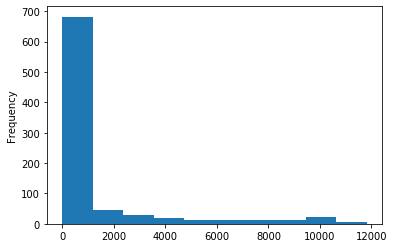

In [0]:
adjectives_length(df)

In [0]:
df.head()
import numpy as np

In [0]:
def text_length(reviews):
    '''
        Prints the stats for number of characters and words in each review.
        And the mean length (in terms of words), std of the reviews

        Note: The dataframe you are passing should have a column 'text' in it for this function to work
    '''

    # reviews['reviews_length_characters'] = reviews['text'].apply(len)
    # print('The character count of the reviews have the following stats: \n')
    # print(reviews['reviews_length_characters'].describe(), '\n')

    reviews['word_length'] = reviews.text.str.len()
    print(reviews['text'])
    print('The word count of the reviews have the following stats: \n')
    print(reviews['word_length'].describe(), '\n')
    # fig, ax = plt.subplots()
    # reviews['word_length'].value_counts().plot.hist()
    # plt.show()
    fig, ax = plt.subplots()
    reviews['word_length'].value_counts().plot(ax=ax, kind='bar')
    # plt.xticks(ax,rotation=90)
    plt.xticks(np.arange(min(ax), max(ax)+1, 1.0))
    plt.tick_params(axis='x', which='major', labelsize=0.5)
    
    plt.tight_layout()

In [0]:
df.head()

Unnamed: 0  ... word_length
0           0  ...        1407
1           1  ...         366
2           2  ...         722
3           3  ...         443
4           4  ...        1249

[5 rows x 6 columns]

In [0]:
df.drop(columns=['Unnamed: 0'])

text  ...  word_length
0       ["'ll", 'first', 'admit', 'excited', 'going', ...  ...         1407
1       ['one', 'best', 'italian', 'restaurant', 'city...  ...          366
2       ['absolutely', 'fantastic', 'looking', 'quiet'...  ...          722
3       ["'s", 'mt', 'washington', 'view', 'inside', '...  ...          443
4       ['favorite', 'amongst', 'girlfriend', 'family'...  ...         1249
...                                                   ...  ...          ...
999995  ['khoury', "'s", 'new', 'improved', 'location'...  ...          696
999996  ['ever', 'since', 'wife', 'brought', 'home', '...  ...          140
999997  ['ordered', 'online', 'website', 'chicken', 's...  ...          178
999998  ['wonderful', 'authentic', 'mediterranean', 'c...  ...          170
999999  ['place', 'absolutely', 'amazing', 'could', "n...  ...          253

[1000000 rows x 5 columns]

In [0]:
import matplotlib.pyplot as plt

def ratings_pie_chart(reviews):
    grouped_by_ratings = reviews.groupby('stars_x')
    ratings_vs_count = grouped_by_ratings['stars_x'].describe()
    # print(type(ratings_vs_count))
    print(ratings_vs_count['count'], '\n')
    country_data = ['1', '2', '3', '4', '5']
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
    explode = (0, 0, 0, 0, 0)
    plt.pie(ratings_vs_count['count'], labels=country_data, explode=explode, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.title("Ratings Distribution")
    plt.show()
    return 0

In [0]:
print(len(df))

1000000


stars_x
1     96158.0
2     83255.0
3    125090.0
4    264870.0
5    430627.0
Name: count, dtype: float64 



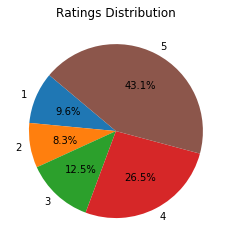

0

In [0]:
ratings_pie_chart(df)

In [0]:
df.head()

Unnamed: 0  ...                                          something
0           0  ...  <pandas.core.strings.StringMethods object at 0...
1           1  ...  <pandas.core.strings.StringMethods object at 0...
2           2  ...  <pandas.core.strings.StringMethods object at 0...
3           3  ...  <pandas.core.strings.StringMethods object at 0...
4           4  ...  <pandas.core.strings.StringMethods object at 0...

[5 rows x 7 columns]

In [0]:
print(df['real_adjectives'][0])

['excited', 'online', 'special', 'overpriced', 'big', 'special', 'perfect', 'good', 'proud', 'incredible', 'good', 'nice', 'u', 'free', 'last', 'slow', 'large', 'good', 'special', 'chicken', 'good', 'big', 'bland', 'large', 'available']


Creating a list of positive and negative adjectives

In [0]:
import ast

In [0]:
global_pos_list=[]
global_neg_list=[]
for  index,row in df.iterrows():
  if(index%10000==0):
    print(index)
  rv_adj_lst_txt=row['real_adjectives']
  rv_adj_list = ast.literal_eval(rv_adj_lst_txt)
  pos_list=[]
  neg_list=[]
  for adj in rv_adj_list:
    ind=adj_list.index(adj)
    pos_list.append(pos_score_list[ind])
    neg_list.append(neg_score_list[ind])
  global_pos_list.append(pos_list)
  global_neg_list.append(neg_list)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [0]:
df['positive_scores']=global_pos_list
df['negative_scores']=global_neg_list

In [0]:
df.head()

Unnamed: 0  ...                                    negative_scores
0           0  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1           1  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2           2  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3           3  ...                             [0.0, 0.0, 0.0, 0.375]
4           4  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...

[5 rows x 9 columns]

Corresponding Positive and negative scores for each adjective in our reviews.

In [0]:
df.drop(columns=['something'])

Unnamed: 0  ...                                    negative_scores
0                0  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1                1  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2                2  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3                3  ...                             [0.0, 0.0, 0.0, 0.375]
4                4  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...
...            ...  ...                                                ...
999995      999995  ...  [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0...
999996      999996  ...                                         [0.0, 0.0]
999997      999997  ...                             [0.0, 0.125, 0.0, 0.0]
999998      999998  ...                          [0.0, 0.0, 0.0, 0.0, 0.0]
999999      999999  ...                        [0.0, 0.625, 0.0, 0.0, 0.0]

[1000000 rows x 8 columns]

In [0]:
df=df.drop(columns=['Unnamed: 0'])

In [0]:
df.head()

text  ...                                    negative_scores
0  ["'ll", 'first', 'admit', 'excited', 'going', ...  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1  ['one', 'best', 'italian', 'restaurant', 'city...  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2  ['absolutely', 'fantastic', 'looking', 'quiet'...  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3  ["'s", 'mt', 'washington', 'view', 'inside', '...  ...                             [0.0, 0.0, 0.0, 0.375]
4  ['favorite', 'amongst', 'girlfriend', 'family'...  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...

[5 rows x 8 columns]

In [0]:
df=df[['text','stars_x','real_adjectives','positive_scores','negative_scores','word_length','adjectives_len']]

In [0]:
df.head()

text  ...  adjectives_len
0  ["'ll", 'first', 'admit', 'excited', 'going', ...  ...             236
1  ['one', 'best', 'italian', 'restaurant', 'city...  ...              78
2  ['absolutely', 'fantastic', 'looking', 'quiet'...  ...             158
3  ["'s", 'mt', 'washington', 'view', 'inside', '...  ...              50
4  ['favorite', 'amongst', 'girlfriend', 'family'...  ...             138

[5 rows x 7 columns]

In [0]:
df=df.drop(columns=['word_length','adjectives_len'])

In [0]:
df.head()

text  ...                                    negative_scores
0  ["'ll", 'first', 'admit', 'excited', 'going', ...  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1  ['one', 'best', 'italian', 'restaurant', 'city...  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2  ['absolutely', 'fantastic', 'looking', 'quiet'...  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3  ["'s", 'mt', 'washington', 'view', 'inside', '...  ...                             [0.0, 0.0, 0.0, 0.375]
4  ['favorite', 'amongst', 'girlfriend', 'family'...  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...

[5 rows x 5 columns]

In [0]:
df.to_csv('adjectives_1.csv')

********************************

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/'My Drive'/'CIS 520 Project'

/content/drive/My Drive/CIS 520 Project


In [0]:
ls

 adjective_freq.json         restaurant_reviews.csv
 Adjective.ipynb             reviews_bow.csv
 adjectives_1.csv            reviews_bow.csv.zip
 adjectives.csv              Run.ipynb
 adj_freq.csv                text_stars.csv
'lexica dictionaries.gdoc'   word2vec_adj.bin
 __MACOSX/                   word2vec_embed.bin.trainables.syn1neg.npy


In [0]:
import pandas as pd
import ast


In [0]:
df1=pd.read_csv('adjectives_1.csv')
df1=df1.drop(columns=['Unnamed: 0'])
df1.head()

text  ...                                    negative_scores
0  ["'ll", 'first', 'admit', 'excited', 'going', ...  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1  ['one', 'best', 'italian', 'restaurant', 'city...  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2  ['absolutely', 'fantastic', 'looking', 'quiet'...  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3  ["'s", 'mt', 'washington', 'view', 'inside', '...  ...                             [0.0, 0.0, 0.0, 0.375]
4  ['favorite', 'amongst', 'girlfriend', 'family'...  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...

[5 rows x 5 columns]

In [0]:
print(len(df1))

1000000


In [0]:
adj_list=[]
pos_list=[]
neg_list=[]

In [0]:

i=0
for index, row in df1.iterrows():
  adjlist=ast.literal_eval(row['real_adjectives'])
  poslist=ast.literal_eval(row['positive_scores'])
  neglist=ast.literal_eval(row['negative_scores'])
  for word in adjlist:
    if((i%1000)==0):
      print(i)
    i+=1
    if word not in adj_list:
      adj_list.append(word)
      local_index=adjlist.index(word)
      pos_list.append(poslist[local_index])
      neg_list.append(neglist[local_index])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [0]:
  print(len(adj_list))

9493


In [0]:
print(len(pos_list))

9493


In [0]:
print(adj_list[0],pos_list[0],neg_list[0])

excited 0.25 0.5


In [0]:
p_indices=sorted(range(len(pos_list)), key=lambda i: pos_list[i])[-20:]
n_indices=sorted(range(len(neg_list)), key=lambda i: neg_list[i])[-20:]

top 20 positice adjectives

In [0]:
for ind in p_indices:
  print(pos_list[ind])
  print(adj_list[ind])


0.875
awing
0.875
flushed
0.875
selfless
0.875
quaintest
0.875
diffident
0.875
betterer
0.875
faber
0.875
rosy-cheeked
0.875
solider
0.875
worthiest
0.875
peachier
0.875
decenter
1.0
excellent
1.0
fantabulous
1.0
sensational
1.0
top-flight
1.0
topping
1.0
first-class
1.0
estimable
1.0
top-hole


Top 20 negative adjectives


In [0]:
for ind in n_indices:
  print(neg_list[ind])
  print(adj_list[ind])


0.875
maddening
0.875
fireproof
0.875
thorny
0.875
cataclysmic
0.875
simulated
0.875
untreated
0.875
lugubrious
0.875
chintziest
0.875
slanderous
0.875
spasmodic
0.875
convulsive
0.875
bush-league
0.875
incontrovertible
0.875
mussy
0.875
otherworldly
0.889
inauspicious
1.0
shoddy
1.0
deplorable
1.0
lamentable
1.0
shoddier


#**Word2Vec**

**Here we use Word2Vec embeddings on the review dataset, and further average over all the embeddings of the words in each review to get an embedding for each review.** 

In [0]:
#preparing X and y!!!
csvfile = 'reviews_bow.csv'
x, y = get_data(csvfile)
warnings.filterwarnings("ignore")
x,y = x[:100000],y[:100000]
print('Data loaded')

Data loaded


**The size of embedding is 200. Each word will be converted to a vector of dimension 200.**

In [0]:
def create_word2vec(reviews, embed_file, size=200, window=10, min_count=5, workers=20, it=5):
  model = Word2Vec(reviews, size=size, window=window, min_count=min_count, workers=workers, iter=it)
  words = list(model.wv.vocab)
  # words = model.wv.vocab
  model.save(embed_file)
  return model, words

In [0]:
model,word_vocab=create_word2vec(x,'reviews_w2v.bin')

In [0]:
final_rev_model=np.zeros((len(x),200))
for rev_ind in range(len(x)):
  rev_model=np.zeros((200))
  rev_vocab_count=0

  for word in x[rev_ind]:
    if word in word_vocab:
      rev_vocab_count+=1
      rev_model+=model[word]
  if(rev_vocab_count!=0):
    rev_model=rev_model/rev_vocab_count
  final_rev_model[rev_ind]=rev_model
    


In [0]:
#preparing y
y_new = np.array(y, dtype=np.uint8)
y_new = np.array([y_new>=4]).astype(dtype = np.int8).reshape(len(x),1)
print(y_new.shape)
unique, counts = np.unique(y_new, return_counts=True)
print(np.asarray((unique, counts)).T)
x_new = np.copy(final_rev_model)
print('x prepared', x_new.shape)

(100000, 1)
[[    0 27829]
 [    1 72171]]
x prepared (100000, 200)


**We further use the same embedding to get the word2Vec embedding for the adjectives in each review**

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

E: Package 'python-software-properties' has no installation candidate


In [0]:
!pip install -U gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.1)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/'My Drive'/'CIS 520 Project'

/content/drive/My Drive/CIS 520 Project


In [0]:
#imports
import warnings
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot
from collections import Counter
import seaborn as sns
import ast

In [0]:
def get_data(csvfile):
  df = pd.read_pickle(csvfile)
  x, y = df['text'].tolist(), df['stars_x'].tolist()
  return x, y

In [0]:
csvfile = 'reviews_bow.csv'
reviews, stars = get_data(csvfile)

**For adjectives, we use an embedding length of 20. Also, we average over the embeddings of all the adjectives in each review to get an (adjective) embedding for each reviw of length 20.**

In [0]:
def create_word2vec(reviews, embed_file, size=20, window=10, min_count=2, workers=10, it=5):
  model = Word2Vec(reviews, size=size, window=window, min_count=min_count, workers=workers, iter=it)
  words = list(model.wv.vocab)
  # words = model.wv.vocab
  model.save(embed_file)
  return model, words

In [0]:
def load_word2vec(embed_file):
  model = Word2Vec.load(embed_file)
  words = list(model.wv.vocab)
  return model, words

In [0]:
embed_file = 'word2vec_embed20.bin'
summary, word_dict = create_word2vec(reviews, embed_file)

In [0]:
df=pd.read_csv('adjectives_1.csv')


In [0]:
df.head()



Unnamed: 0  ...                                    negative_scores
0           0  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1           1  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2           2  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3           3  ...                             [0.0, 0.0, 0.0, 0.375]
4           4  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...

[5 rows x 6 columns]

In [0]:
adj_embeddings=[]

In [0]:
for index,row in df.iterrows():
  ans=np.zeros((20))
  adj_list=ast.literal_eval(row['real_adjectives'])
  for adjective in adj_list:
    if adjective in vocab:
      ans=ans+summary[adjective]
  if(len(adj_list)>0):
    ans=ans/len(adj_list)
  adj_embeddings.append(ans)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
print(len(adj_embeddings))

1000000


In [0]:
print(adj_embeddings[0])

[-2.80742774 -0.33122728  2.77013163 -3.11840487 -3.82751619 -4.91436211
  0.32500048 -0.24270921 -2.067842   -1.72768806 -1.26117571 -1.15746488
  4.41912717  0.67962016  0.78917356  3.16080905  1.2136972  -0.02871443
  0.52352555  1.4290233 ]


In [0]:
df2=pd.DataFrame(columns=['Embedding'])
df2['Embedding']=adj_embeddings
df2['stars']=df['stars_x']


In [0]:
df2.head()

Embedding  stars
0  [-2.8074277377128602, -0.3312272834777832, 2.7...      4
1  [1.5115318638937814, 3.91703291450228, -2.1907...      5
2  [0.8111052513122559, 1.876916797955831, 0.1884...      5
3  [1.199437566101551, 1.4128755033016205, 1.0355...      4
4  [-0.4104820719132057, 1.1869363842102199, 0.52...      5

In [0]:
df2.to_pickle('adj_embedding_rating.pkl')

# **Data Visualisation**

**Importing required libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

**Function to plot a pie chart showing the distribution of the rating across the five classes**

In [0]:
def ratings_pie_chart(reviews):
    '''
      Plots a pie-chart showing the distribution of ratings across the five classes.
      Input parameter reviews is the read dataframe consisting of column stars_x
    '''
    grouped_by_ratings = reviews.groupby('stars_x')
    print('The distribution of stars in the dataset is as follows: ')
    ratings_vs_count = grouped_by_ratings['stars_x'].describe()
    print(ratings_vs_count['count'], '\n')
    country_data = ['1', '2', '3', '4', '5']
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
    explode = (0, 0, 0, 0, 0)
    plt.pie(ratings_vs_count['count'], labels=country_data, explode=explode, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.title("Ratings Distribution")
    plt.show()

**Function to give the most frequent adjectives occuring across the reviews in the dataset**


In [0]:
def adjectives_count(chunk):
    '''
       Prints the adjectives in descending order of their frequency and gives a bar plot
       of the 10 most frequent adjectives in the input reviews
    '''
    # print(pd.Series(' '.join(chunk['real_adjectives']).lower().split()).value_counts())
    list_adjectives = (Counter(" ".join(chunk["real_adjectives"]).lower().split()).most_common(5))
    dict_words = dict(list_adjectives)
    # print(dict_words)
    names = list(dict_words.keys())
    values = list(dict_words.values())
    plt.bar(range(len(dict_words)), values, tick_label=names)
    plt.show()

**Function to plot the review length and adjective count distribution**

In [0]:
def plot_distribution(column_name,charac):
  
  print('The ' + column_name + ' count of the reviews have the following stats: \n')
  print(reviews[charac].describe(), '\n')
  len_list = reviews[charac].tolist()
  _ = plt.hist(np.array(len_list), bins='auto')
  plt.title(column_name +" length distribution")
  plt.show()

In [0]:
def plot_adjectives_count(): 
  print('\n \n The top 5 adjectives in the dataset are: ')
  adjectives_count(reviews)

  print('\n \n The top 5 adjectives in the dataset with 5 star ratings are: ')
  adjectives_count(reviews.loc[reviews['stars_x'] == 5])

  print('\n \n The top 5 adjectives in the dataset with 4 star ratings are: ')
  adjectives_count(reviews.loc[reviews['stars_x'] == 4])

  print('\n \n The top 5 adjectives in the dataset with 3 star ratings are: ')
  adjectives_count(reviews.loc[reviews['stars_x'] == 3])

  print('\n \n The top 5 adjectives in the dataset with 2 star ratings are: ')
  adjectives_count(reviews.loc[reviews['stars_x'] == 2])

  print('\n \n The top 5 adjectives in the dataset with 1 star ratings are: ')
  adjectives_count(reviews.loc[reviews['stars_x'] == 1])

In [0]:
#Read the dataset

reviews=pd.read_csv('adjectives_1.csv')
reviews.drop(columns=['Unnamed: 0'])

text  ...                                    negative_scores
0       ["'ll", 'first', 'admit', 'excited', 'going', ...  ...  [0.5, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.0, 0...
1       ['one', 'best', 'italian', 'restaurant', 'city...  ...              [0.0, 0.0, 0.5, 0.0, 0.0, 0.125, 0.0]
2       ['absolutely', 'fantastic', 'looking', 'quiet'...  ...  [0.0, 0.625, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
3       ["'s", 'mt', 'washington', 'view', 'inside', '...  ...                             [0.0, 0.0, 0.0, 0.375]
4       ['favorite', 'amongst', 'girlfriend', 'family'...  ...  [0.0, 0.0, 0.0, 0.0, 0.375, 0.375, 0.5, 0.0, 0...
...                                                   ...  ...                                                ...
999995  ['khoury', "'s", 'new', 'improved', 'location'...  ...  [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.25, 0.0...
999996  ['ever', 'since', 'wife', 'brought', 'home', '...  ...                                         [0.0, 0.0]
999997  ['ordered', 'online', 'website', 'chicken', 's...  ...                             [0.0, 0.125, 0.0, 0.0]
999998  ['wonderful', 'authentic', 'mediterranean', 'c...  ...                          [0.0, 0.0, 0.0, 0.0, 0.0]
999999  ['place', 'absolutely', 'amazing', 'could', "n...  ...                        [0.0, 0.625, 0.0, 0.0, 0.0]

[1000000 rows x 5 columns]

**Getting the count of:**<br>
**1. total words present in each review**<br>
**2. number of adjectives present in each review**

In [0]:
#Add word and adjective count column

list2=[]
for index,row in reviews.iterrows():
  list1=ast.literal_eval(row['text'])
  list2.append(len(list1))
reviews['word_length']=list2

list2=[]
for index,row in reviews.iterrows():
  list1=ast.literal_eval(row['real_adjectives'])
  list2.append(len(list1))
reviews['adjectives_len']=list2

**Visualizing the data characteristics by using functions written above**


The distribution of stars in the dataset is as follows: 
stars_x
1     96158.0
2     83255.0
3    125090.0
4    264870.0
5    430627.0
Name: count, dtype: float64 



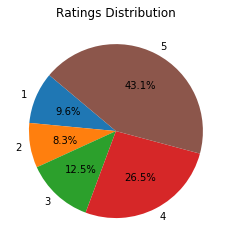

count    1000000.000000
mean          56.259680
std           52.114916
min            0.000000
25%           23.000000
50%           40.000000
75%           72.000000
max          905.000000
Name: word_length, dtype: float64 



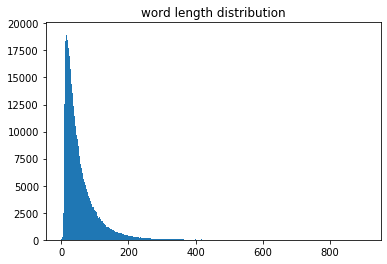

count    1000000.000000
mean           8.750801
std            7.673260
min            0.000000
25%            4.000000
50%            7.000000
75%           11.000000
max          123.000000
Name: adjectives_len, dtype: float64 



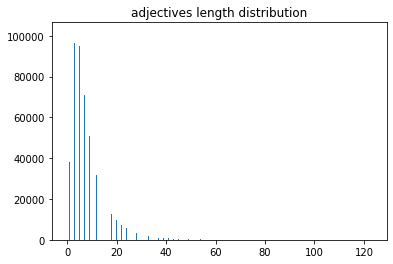


 
 The top 5 adjectives in the dataset are: 


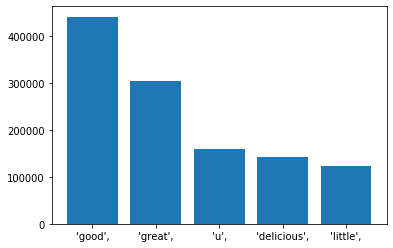


 
 The top 5 adjectives in the dataset with 5 star ratings are: 


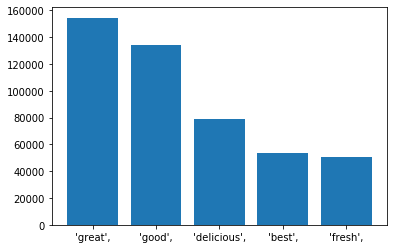


 
 The top 5 adjectives in the dataset with 4 star ratings are: 


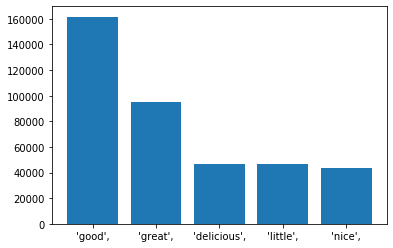


 
 The top 5 adjectives in the dataset with 3 star ratings are: 


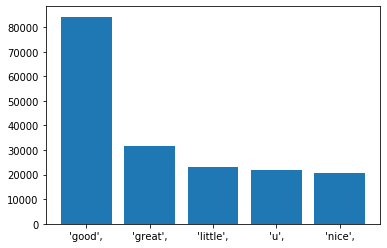


 
 The top 5 adjectives in the dataset with 2 star ratings are: 


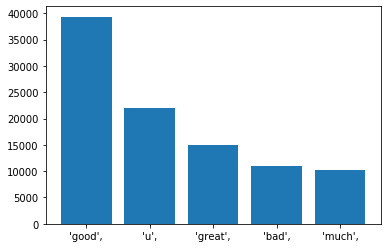


 
 The top 5 adjectives in the dataset with 1 star ratings are: 


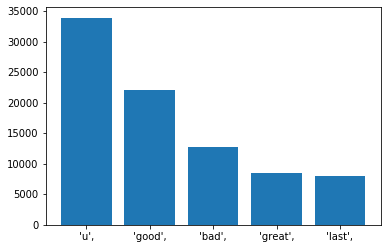

In [0]:
#Visualize

ratings_pie_chart(reviews)
plot_distribution('word','word_length')
plot_distribution('adjectives', 'adjectives_len')
plot_adjectives_count()

Word2Vec Visualizations

In [0]:
def load_word2vec(embed_file):
  model = Word2Vec.load(embed_file)
  words = list(model.wv.vocab)
  return model, words

In [0]:
embed_file = 'word2vec_embed20.bin'
summary, word_dict = load_word2vec(embed_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


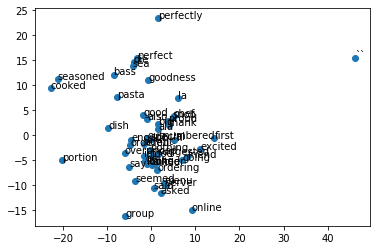

In [0]:
num_words = 50
X_vis = summary[word_dict[:num_words]]
pca = PCA(n_components=2)
result = pca.fit_transform(X_vis)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(summary.wv.vocab)
for i, word in enumerate(words):
  if i>num_words-1:
    break
  else:
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()